# 📊 Customer Data Analysis & Machine Learning
This notebook performs:
- Data Cleaning
- Exploratory Data Analysis (EDA) with Graphs
- Machine Learning (Customer Segmentation or Churn Prediction)

🔹 **By: Your Name**
🔹 **Dataset: customers-10000.csv**

In [1]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("Libraries imported successfully!")

Libraries imported successfully!


## 📂 Load and Inspect Data

In [32]:
# Load dataset (Upload in Colab)
from google.colab import files
uploaded = files.upload()

# Read CSV
df = pd.read_csv(list(uploaded.keys())[0])
df.head(5)

Saving customers-10000.csv to customers-10000 (1).csv


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,EB54EF1154C3A78,Heather,Callahan,Mosley-David,Lake Jeffborough,Norway,043-797-5229,915.112.1727,urangel@espinoza-francis.net,2020-08-26,http://www.escobar.org/
1,2,10dAcafEBbA5FcA,Kristina,Ferrell,"Horn, Shepard and Watson",Aaronville,Andorra,932-062-1802,(209)172-7124x3651,xreese@hall-donovan.com,2020-04-27,https://tyler-pugh.info/
2,3,67DAB15Ebe4BE4a,Briana,Andersen,Irwin-Oneal,East Jordan,Nepal,8352752061,(567)135-1918,haleybraun@blevins-sexton.com,2022-03-22,https://www.mack-bell.net/
3,4,6d350C5E5eDB4EE,Patty,Ponce,Richardson Group,East Kristintown,Northern Mariana Islands,302.398.3833,196-189-7767x770,hohailey@anthony.com,2020-07-02,https://delacruz-freeman.org/
4,5,5820deAdCF23EFe,Kathleen,Mccormick,Carson-Burch,Andresmouth,Macao,001-184-153-9683x1497,552.051.2979x342,alvaradojesse@rangel-shields.com,2021-01-17,https://welch.info/


## 🔍 Data Cleaning

In [3]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Index', 'Phone 1', 'Phone 2'])

# Convert Subscription Date to datetime format
df_cleaned['Subscription Date'] = pd.to_datetime(df_cleaned['Subscription Date'], errors='coerce')

# Display dataset info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer Id        10000 non-null  object        
 1   First Name         10000 non-null  object        
 2   Last Name          10000 non-null  object        
 3   Company            10000 non-null  object        
 4   City               10000 non-null  object        
 5   Country            10000 non-null  object        
 6   Email              10000 non-null  object        
 7   Subscription Date  10000 non-null  datetime64[ns]
 8   Website            10000 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 703.3+ KB


## 📊 Customer Distribution by Country

<ipython-input-11-16f8e226df41>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')


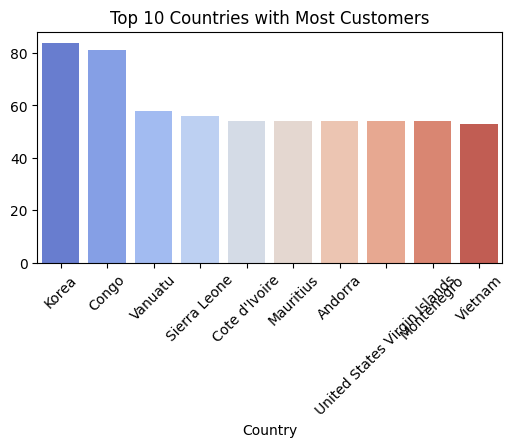

In [11]:
# Top 10 countries with most customers
top_countries = df_cleaned['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(6,3))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries with Most Customers')
plt.xticks(rotation=45)
plt.show()

## 📈 Subscription Trend Over Time

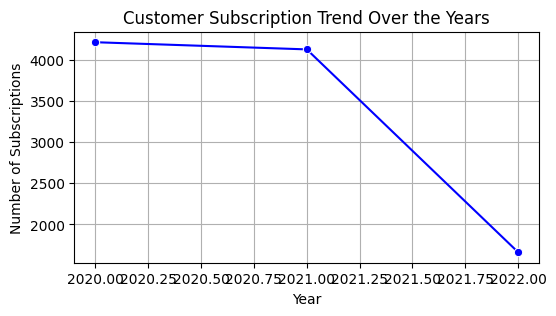

In [12]:
# Aggregate subscriptions by year
df_cleaned['Year'] = df_cleaned['Subscription Date'].dt.year
subscriptions_per_year = df_cleaned['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,3))
sns.lineplot(x=subscriptions_per_year.index, y=subscriptions_per_year.values, marker='o', color='blue')
plt.title('Customer Subscription Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Subscriptions')
plt.grid(True)
plt.show()

## 🤖 Machine Learning: Customer Segmentation (Clustering)

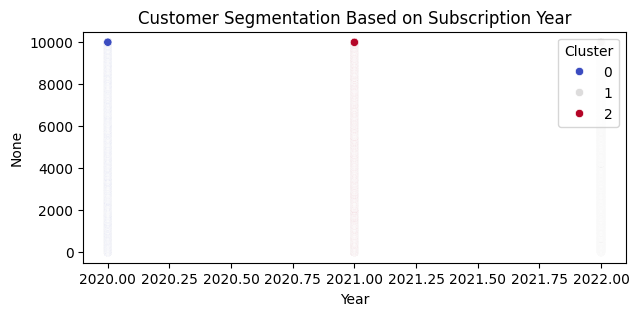

In [17]:
# Prepare data for clustering
features = df_cleaned[['Year']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

# Plot Clusters
plt.figure(figsize=(7,3))
sns.scatterplot(x=df_cleaned['Year'], y=df_cleaned.index, hue=df_cleaned['Cluster'], palette='coolwarm')
plt.title('Customer Segmentation Based on Subscription Year')
plt.show()

# 🔥 Classification Models (Logistic Regression, Random Forest, SVM)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encode categorical target variable (Example: 'Country' as classification target)
label_encoder = LabelEncoder()
df_cleaned['Country_Label'] = label_encoder.fit_transform(df_cleaned['Country'])

# Define features and target
X = df_cleaned[['Year']]
y = df_cleaned['Country_Label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.01
Random Forest Accuracy: 0.01
Support Vector Machine Accuracy: 0.01


# 📈 Regression Models (Linear Regression, Decision Trees)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Define target variable (Example: Predicting year of subscription)
y_reg = df_cleaned['Year']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor()
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} MAE: {mae:.2f}')

Linear Regression MAE: 0.00
Decision Tree MAE: 0.00


# 🎯 Clustering (K-Means, Expectation Maximization)

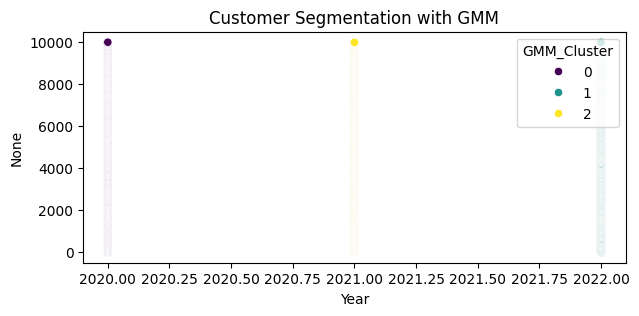

In [21]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model (Expectation Maximization)
gmm = GaussianMixture(n_components=3, random_state=42)
df_cleaned['GMM_Cluster'] = gmm.fit_predict(features_scaled)

# Visualize clustering
plt.figure(figsize=(7,3))
sns.scatterplot(x=df_cleaned['Year'], y=df_cleaned.index, hue=df_cleaned['GMM_Cluster'], palette='viridis')
plt.title('Customer Segmentation with GMM')
plt.show()

# 🔥 Collaborative Filtering (ALS, Matrix Factorization)

In [25]:
!pip install scikit-surprise
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Simulated collaborative filtering dataset (needs real user-product data)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_cleaned[['Customer Id', 'Year', 'Country_Label']], reader)

# Split dataset
trainset, testset = train_test_split(data, test_size=0.2)

# Train Matrix Factorization model (SVD)
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)
print(predictions[:5])  # Show sample predictions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505175 sha256=84e7e604cd6502b5cbbdb274379f7b7cee28dfa05bb22d2f69a0211958b8ca1f
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
[Prediction(uid='b82cDFA96Cf8353', iid=2021, r_ui=31.0, est=5, details={'was_impossible': False}), Prediction(uid='DBc9bBe760Fe1eF', iid=2022, r_ui=98.0, est=5, details={'was_impossible': False}), Prediction(uid='ABA6f356ebfeAcE', iid=2021, r_ui=129.0, est=5, details={'was_impossible': False}), Prediction(uid='f45e5b4d8afaf9B', iid=2021, r_ui=98.0, est=5, details={'was_impossible': False}), Prediction(uid='610f3FAFBEd6F7a', iid=2021, r_ui=192.0, est=5, de

# 🎭 Dimensionality Reduction (PCA)

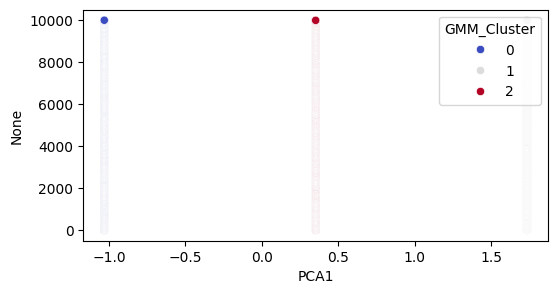

In [31]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(features_scaled)
df_cleaned['PCA1'] = pca_result[:, 0]


# Scatter plot of PCA (updated for 1 PCA component)
plt.figure(figsize=(6,3))
sns.scatterplot(x=df_cleaned['PCA1'], y=df_cleaned.index, hue=df_cleaned['GMM_Cluster'], palette='coolwarm')
plt.show()